# Install and Import modules then set the datafile

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

dating = pd.read_csv('raw_speed_dating.csv', encoding='ISO-8859-1')
dating.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Select only the attributes we will use

In [36]:
# Now that we know which features we want and which ones we do not. See Excel file.
listfeat = 'iid,gender,pid,match,partner,id,wave,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match_es'
# Converting it to an array
listfeat = listfeat.split(',')
# Using this array to select those features from the dataset
ds = dating[listfeat]

#Rename attractiveness given to other person to _o
# attr,sinc,intel,fun,amb,shar,like,prob
ds = ds.rename(
    columns={'attr': 'attr_o', 'sinc': 'sinc_o', 'intel': 'intel_o', 'amb': 'amb_o', 'shar': 'shar_o', 'like': 'like_o',
             'prob': 'prob_o'})

# Replace '' to NaN (not necessary if you run locally)
ds = ds.replace('', np.nan, regex=True)
ds.describe()

,iid,gender,pid,match,partner,id,wave,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match_es
count,8378.000000,8378.000000,8368.000000,8378.000000,8378.000000,8377.000000,8378.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,7205.000000
mean,283.675937,0.500597,283.863767,0.164717,8.963595,8.960248,11.350919,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,5.006762,2.158091,5.277791,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,5.534131,5.570556,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,26.394360,11.071506,12.636308,15.566805,9.780089,11.014845,30.362192,13.273691,14.416891,18.422620,11.744499,11.854817,7.084733,8.294935,7.704460,8.403965,7.578388,6.941908,7.927232,8.284346,7.426213,7.617611,3.207814
std,158.583367,0.500029,158.584899,0.370947,5.491068,5.491329,5.995903,3.566763,3.758935,1.230905,2.845708,2.805237,1.407181,1.444531,1.105246,3.309520,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,1.734059,4.762569,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,16.297045,6.659233,6.717476,7.328256,6.998428,6.060150,16.249937,6.976775,6.263304,6.577929,6.886532,6.167314,1.395783,1.407460,1.564321,1.076608,1.778315,1.498653,1.627054,1.283657,1.779129,1.773094,2.444813
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,0.000000
25%,154.000000,0.000000,154.000000,0.000000,4.000000,4.000000,7.000000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,5.000000,2.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,10.000000,6.000000,8.000000,10.000000,5.000000,7.000000,20.000000,10.000000,10.000000,15.000000,6.000000,10.000000,6.000000,8.000000,7.000000,8.000000,7.000000,6.000000,7.000000,8.000000,6.000000,7.000000,2.000000
50%,281.000000,1.000000,281.000000,0.000000,8.000000,8.000000,11.000000,26.000000,8.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,6.000000,7.000000,4.000000,6.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000,6.000000,4.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,25.00000

# Fix all the rows with missing pid, id

In [37]:
#See whats wrong with current dataset
print(ds[['wave','partner','id','pid']].isnull().sum())
#Fix one missing id for iid 552 -> id = 22
ds.loc[ds.iid == 552, 'id'] = 22

#Get all rows with missing pid
no_pid = ds.pid.isnull()

# Fix the missing pid's
for i, row in ds[no_pid].iterrows():
  wave = row.wave
  partner = row.partner
  iid_of_partner = ds.loc[(ds.wave == wave) & (ds.id == partner)].iid.unique()[0]
  ds.loc[i, 'pid'] = iid_of_partner

# Juicy to see the 0 :P
print('After fixes are applied')
print(ds[['wave','partner','id','pid']].isnull().sum())




wave        0
partner     0
id          1
pid        10
dtype: int64
After fixes are applied
wave       0
partner    0
id         0
pid        0
dtype: int64


# Deal with missing values (remove attributes)

In [38]:
#What are we dealing with? This function displays the mean missing values per column sorted descending (most missing values first)
mean_missing = ds.isnull().mean().sort_values(ascending=False)
print(mean_missing)

#Select the columns with more than 40% missing values (you will see from previous result that these are expnum and the 5_1 values. 
# (We could chose later to remove the 4_1 values as well as they show to have ~ 20% missing values)
missing = ds.columns[ds.isnull().mean() > 0.4]

#We could instead just not import these columns in the code block above...
ds = ds.drop(missing, axis=1)

expnum      0.785152
fun5_1      0.414419
intel5_1    0.414419
sinc5_1     0.414419
attr5_1     0.414419
amb5_1      0.414419
shar4_1     0.228097
intel4_1    0.225471
attr4_1     0.225471
sinc4_1     0.225471
              ...   
theater     0.009429
tv          0.009429
race        0.007520
wave        0.000000
id          0.000000
partner     0.000000
match       0.000000
pid         0.000000
gender      0.000000
iid         0.000000
Length: 64, dtype: float64


#Dealing with outliers (Age)

In [39]:
dsIQR = ds.copy()
# detecting and dropping outliers in our data, for the feature age
Q1 = dsIQR['age'].quantile(0.25)
Q3 = dsIQR['age'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
ds = dsIQR.query('(@Q1 - 1.5 * @IQR) <= age <= (@Q3 + 1.5 * @IQR)')

# Standardize the character trait attributes 0 - 100 point distribution



In [41]:
ds2 = ds.copy()

# Select attributes per assessment
traits = ds2.filter(regex='attr', axis=1)
assesments = [name.replace('attr', '') for name in list(traits)]

#All attributes concerning assessments of character traits combined...
combined = [list(ds2.filter(regex=assesment, axis=1)) for assesment in assesments]
print(combined)
count = []
for traits in combined:
    # Drop every row where at least one value is missing (per assessment type)  
    #ds2.dropna(axis=0, subset=traits, how='any', inplace=True)
    # Create total for this assessment type
    total = ds2[traits].replace(np.nan, 0).apply(sum, axis=1)
    #Iterate over rows to correct NaNs where 100 points have already been distributed
    ds2.loc[total == 100, traits] = ds2.loc[total == 100, traits].replace(np.nan, 0)#Idk why, but inplace=True doesn't work here...
    print(ds2[traits].isnull().sum())
    #Standardize values
    #for trait in traits:
        # Create new value for this trait using created total
        #ds2[trait] = ds2[trait] * 100 / total
        
#Values left after removing every row that has a missing value in any of the character traits asessments...
len(ds2.index)
#Change original dataset back to new one
ds = ds2

[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'], ['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1'], ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1'], ['attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']]


attr1_1     16
sinc1_1     16
intel1_1    16
fun1_1      16
amb1_1      16
shar1_1     16
dtype: int64


attr4_1     1780
sinc4_1     1780
intel4_1    1780
fun4_1      1780
amb4_1      1780
shar4_1     1780
dtype: int64


attr2_1     16
sinc2_1     16
intel2_1    16
fun2_1      16
amb2_1      16
shar2_1     16
dtype: int64


attr3_1     42
sinc3_1     42
fun3_1      42
intel3_1    42
amb3_1      42
dtype: int64


## Correlation plots

In [42]:
traits = ['attr', 'sinc', 'fun', 'intel', 'amb']

# Correlate traits against each other.
for f in [list(ds.filter(regex=trait, axis=1)) for trait in traits]:
    correlations = ds[f].corr()
    # plot correlation matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    plt.rcParams['figure.figsize'] = (20, 8)
    ticks = np.arange(0, 5, 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(f)
    ax.set_yticklabels(f)
    plt.show()

NameError: name 'plt' is not defined

In [11]:
# Correlate assessments against each other.
for assesment in combined:
    correlations = ds[assesment].corr()
    # plot correlation matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    plt.rcParams['figure.figsize'] = (20,8)
    ticks = np.arange(0,5,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(assesment)
    ax.set_yticklabels(assesment)
    plt.show()

NameError: ignored

Change missing values with SKlearn Mean

In [43]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(ds)
ds = pd.DataFrame(data=imp.transform(ds), columns=ds.columns)
ds.describe()


C:\Python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,iid,gender,pid,match,partner,id,wave,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,match_es
count,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000
mean,284.293835,0.505672,284.078175,0.165228,8.994451,9.025647,11.371147,26.119852,7.640835,2.764118,3.817272,3.657401,2.111688,4.997524,2.150111,5.297324,6.475661,4.623548,6.275883,7.802693,6.964418,6.687052,5.720410,3.935137,5.773165,7.651223,5.308377,6.745120,7.911539,6.828515,7.835804,5.646405,4.317766,5.512108,22.567074,17.360798,20.261007,17.421955,10.671510,11.773640,26.503791,11.087994,12.696682,15.534597,9.726224,10.977883,30.375844,13.283671,14.505111,18.399935,11.742139,11.774061,7.080813,8.295736,7.706743,8.422657,7.581929,3.216950
std,159.125939,0.499999,158.979362,0.371409,5.499479,5.523196,6.013538,3.148864,3.755643,1.237679,2.853879,2.809287,1.410067,1.440733,1.101945,3.310404,2.597956,2.799106,2.403366,1.725377,2.042819,2.251438,2.570507,2.616692,2.486554,2.011448,2.522174,2.232154,1.702887,2.157047,1.790439,2.604293,2.724373,1.725964,12.655251,7.062708,6.829094,6.157713,6.123267,6.401138,14.444080,5.919403,5.971483,6.479874,6.214132,5.424681,16.317360,6.985356,6.278692,6.580515,6.925007,6.188686,1.398840,1.411437,1.570247,1.064265,1.779178,2.280401
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000
25%,155.250000,0.000000,154.250000,0.000000,4.000000,4.000000,7.000000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,5.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,5.000000,15.000000,15.000000,17.390000,15.000000,5.000000,8.510000,18.000000,8.000000,10.000000,10.000000,6.000000,8.000000,20.000000,10.000000,10.000000,15.000000,5.000000,10.000000,6.000000,8.000000,7.000000,8.000000,7.000000,2.000000
50%,280.000000,1.000000,280.000000,0.000000,8.000000,8.000000,11.000000,26.000000,8.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,6.000000,7.000000,4.000000,7.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000,6.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.260000,26.503791,10.000000,12.696682,15.534597,9.726224,10.000000,25.000000,15.000000,15.000000,20.000000,10.000000,10.000000,7.000000,8.000000,8.000000,8.000000,8.000000,3.000000
75%,409.000000,1.000000,409.000000,0.000000,13.000000,13.000000,15.000000,28.000000,10.000000,4.000000,6.000000,6.000000,2.000000,6.000000,3.000000,7.000000,9.000000,7.000000,8.

# Separate the database in female/male

In [44]:


# We will create two different dataframes, Males and Females
dating_males = ds.loc[ds['gender'] == 1]
# Adding _M to all the columns to identify Male features
dating_males.columns = dating_males.columns + '_M'

dating_females = ds.loc[ds['gender'] == 0]
# Adding _F to all the columns to identify Female features
dating_females.columns = dating_females.columns + '_F'

# Now we will merge the two dataframes, setting the keys in pid_M and iid_F
ds_merged = dating_males.merge(dating_females, left_on='iid_M', right_on='pid_F', how='outer')
# Here we take only the rows containing equal iid_M and pid_F
ds_merged = ds_merged[ds_merged['pid_M'] == ds_merged['iid_F']]
pd.set_option('display.max_columns', 140)

# Now we have 158 columns and we no longer need a few attributes such as iid_M, gender_M ...
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)
# Here we can see how irrelevant they are now:
ds_merged.head(10)

# Let's drop them
ds_merged.__delitem__('iid_M')
ds_merged.__delitem__('gender_M')
ds_merged.__delitem__('pid_M')
ds_merged.__delitem__('match_M')
ds_merged.__delitem__('iid_F')
ds_merged.__delitem__('gender_F')
ds_merged.__delitem__('pid_F')
ds_merged.__delitem__('wave_M')

# The match_F is the match in general, let's rename it
ds_merged = ds_merged.rename(columns={'match_F': 'match', 'wave_F': 'wave'})

#Reseting index
ds_merged = ds_merged.reset_index()
ds_merged.__delitem__('index')
ds_merged.index.name = 'index'
ds_merged.describe()

,partner_M,id_M,age_M,field_cd_M,race_M,imprace_M,imprelig_M,goal_M,date_M,go_out_M,career_c_M,sports_M,tvsports_M,exercise_M,dining_M,museums_M,art_M,hiking_M,gaming_M,clubbing_M,reading_M,tv_M,theater_M,movies_M,concerts_M,music_M,shopping_M,yoga_M,exphappy_M,attr1_1_M,sinc1_1_M,intel1_1_M,fun1_1_M,amb1_1_M,shar1_1_M,attr4_1_M,sinc4_1_M,intel4_1_M,fun4_1_M,amb4_1_M,shar4_1_M,attr2_1_M,sinc2_1_M,intel2_1_M,fun2_1_M,amb2_1_M,shar2_1_M,attr3_1_M,sinc3_1_M,fun3_1_M,intel3_1_M,amb3_1_M,match_es_M,match,partner_F,id_F,wave,age_F,field_cd_F,race_F,imprace_F,imprelig_F,goal_F,date_F,go_out_F,career_c_F,sports_F,tvsports_F,exercise_F,dining_F,museums_F,art_F,hiking_F,gaming_F,clubbing_F,reading_F,tv_F,theater_F,movies_F,concerts_F,music_F,shopping_F,yoga_F,exphappy_F,attr1_1_F,sinc1_1_F,intel1_1_F,fun1_1_F,amb1_1_F,shar1_1_F,attr4_1_F,sinc4_1_F,intel4_1_F,fun4_1_F,amb4_1_F,shar4_1_F,attr2_1_F,sinc2_1_F,intel2_1_F,fun2_1_F,amb2_1_F,shar2_1_F,attr3_1_F,sinc3_1_F,fun3_1_F,intel3_1_F,amb3_1_F,match_es_F
count,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.00000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000
mean,9.214686,8.907700,26.426058,7.340942,2.739164,3.465069,3.107853,2.132330,4.856440,2.168791,5.246723,7.060173,4.995156,6.031362,7.450025,6.555074,6.224885,5.520653,4.494901,5.614227,7.435492,4.864610,6.077511,7.643804,6.571137,7.704233,4.762111,3.672616,5.892912,26.848315,16.488401,19.572185,17.672879,8.528993,11.015092,27.889658,10.832521,12.288875,16.131450,8.046965,10.902629,25.069039,15.175161,16.339225,18.184289,14.210324,11.003819,6.944001,8.157580,7.508163,8.505657,7.531079,3.393083,0.165732,8.907700,9.214686,11.396991,25.809281,7.963284,2.790413,4.171871,4.219153,2.082047,5.146344,2.139062,5.347617,5.873945,4.228704,6.516934,8.171301,7.383588,7.159866,5.933332,3.367660,5.923603,7.881290,5.759290,7.432922,8.189338,7.077067,7.95471,6.553376,4.984723,5.114022,18.175164,18.272239,21.005308,17.149016,12.820840,12.549966,25.166302,11.332521,13.116004,14.966228,11.437837,11.058672,35.819137,11.328182,12.650554,18.592634,9.253923,12.544473,7.215946,8.440616,7.898511,8.341954,7.626967,3.059888
std,5.622377,5.433904,3.077303,3.562210,1.239098,2.638546,2.564117,1.422334,1.428047,1.151412,3.107647,2.414981,2.909013,2.375658,1.785251,2.079681,2.329394,2.569256,2.660622,2.540432,2.024599,2.478014,2.112643,1.787014,2.267309,1.904029,2.534890,2.596647,1.646139,13.683072,7.262679,6.755020,6.663896,5.904829,6.799093,15.357684,6.131489,6.386538,6.875699,5.183699,5.547096,13.316873,7.181326,6.755708,6.655851,7.443342,6.161335,1.451135,1.428309,1.697374,1.103913,1.942988,2.267970,0.371887,5.433904,5.622377,6.030292,3.166442,3.941316,1.235135,3.017406,2.930223,1.386329,1.438531,1.053227,3.506759,2.646440,2.625094,2.411514,1.574676,1.914517,2.062856,2.553724,2.452759,2.4208

# Encode the data for categorical and binary attributes

In [45]:
ds_merged = pd.get_dummies(ds_merged)

# Dividing the dataset in two depending on the rating scales (1-10) vs (100 point distribution)

In [46]:
waves = (6,7,8,9)
ds10_merged = ds_merged.loc[ds_merged['wave'].isin(waves)]

ds_merged = ds_merged.loc[~ds_merged['wave'].isin(waves)]
ds_merged.wave.unique()

array([12.,  1., 14., 15.,  5., 21.,  3., 11., 13., 16., 17.,  4.,  2.,
       18., 19., 20., 10.])

# Making the training set


In [50]:
# Make everything int
for column in ds_merged.columns:
    ds_merged[column] = pd.to_numeric(ds_merged[column]).astype(int)

training_features, test_features, 
training_target, test_target, = train_test_split(ds_merged.drop(['match'], axis=1),
                                                 ds_merged['match'],
                                                 test_size=.1,
                                                 random_state=12)

x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size=.1,
                                                  random_state=12)
sm = SMOTE(random_state=12, ratio=1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

print('Validation Results')
print(clf_rf.score(x_val, y_val))
print(recall_score(y_val, clf_rf.predict(x_val)))
print('\nTest Results')
print(clf_rf.score(test_features, test_target))
print(recall_score(test_target, clf_rf.predict(test_features)))



Validation Results
0.8229166666666666
0.2558139534883721

Test Results
0.80625
0.2982456140350877


# Creating SMOTE settings

0    2404
1     472
Name: match, dtype: int64 [2404 2404]


In [0]:
from google.colab import files


ds.index.name = 'index'

file = ds.to_csv('speeddating.csv', sep=',', encoding='utf-8')

files.download('speeddating.csv')


In [19]:
#Check the version of the libraries

#Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 2.7.15rc1 (default, Apr 15 2018, 21:51:34) 
[GCC 7.3.0]
scipy: 0.19.1
numpy 1.14.6
matplotlib: 2.1.2
pandas: 0.22.0
sklearn: 0.19.2


In [0]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [21]:
# Load dataset

ds_a = ds.copy()
pd.set_option('display.max_columns', 20)
ds_a.describe()

,iid,gender,pid,match,partner,id,wave,age,field_cd,race,...,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,match_es
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,...,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,283.675937,0.500597,283.677727,0.164717,8.963595,8.961805,11.350919,26.358928,7.662488,2.757186,...,14.416891,18.422620,11.730347,11.840533,7.084733,8.294935,7.704460,8.403965,7.578388,3.207814
std,158.583367,0.500029,158.581569,0.370947,5.491068,5.492849,5.995903,3.546480,3.740492,1.226267,...,6.233700,6.546839,6.861846,6.148107,1.387008,1.398611,1.554486,1.069839,1.767135,2.267192
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000
25%,154.000000,0.000000,154.000000,0.000000,4.000000,4.000000,7.000000,24.000000,5.000000,2.000000,...,10.000000,15.000000,6.000000,10.000000,6.000000,8.000000,7.000000,8.000000,7.000000,2.000000
50%,281.000000,1.000000,281.000000,0.000000,8.000000,8.000000,11.000000,26.000000,8.000000,2.000000,...,15.000000,20.000000,10.000000,10.000000,7.000000,8.147468,8.000000,8.000000,8.000000,3.000000
75%,407.000000,1.000000,407.000000,0.000000,13.000000,13.000000,15.000000,28.000000,10.000000,4.000000,...,20.000000,20.000000,15.000000,15.630000,8.000000,9.000000,9.000000,9.000000,9.000000,4.000000
max,552.000000,1.000000,552.000000,1.000000,22.000000,22.000000,21.000000,55.000000,18.000000,6.000000,...,40.000000,50.000000,50.000000,30.000000,10.000000,10.000000,10.000000,10.000000,10.000000,18.000000


In [22]:
# shape
print(ds_a.shape)

(8378, 58)


In [23]:
# head
print(ds_a.head(20))

         iid  gender    pid  match  partner    id  wave   age  field_cd  race  \
index                                                                           
0      153.0     0.0  158.0    0.0      1.0  12.0   7.0  28.0       7.0   4.0   
1      153.0     0.0  159.0    1.0      2.0  12.0   7.0  28.0       7.0   4.0   
2      153.0     0.0  160.0    0.0      3.0  12.0   7.0  28.0       7.0   4.0   
3      153.0     0.0  161.0    0.0      4.0  12.0   7.0  28.0       7.0   4.0   
4      153.0     0.0  162.0    0.0      5.0  12.0   7.0  28.0       7.0   4.0   
5      153.0     0.0  163.0    1.0      6.0  12.0   7.0  28.0       7.0   4.0   
6      153.0     0.0  164.0    0.0      7.0  12.0   7.0  28.0       7.0   4.0   
7      153.0     0.0  165.0    0.0      8.0  12.0   7.0  28.0       7.0   4.0   
8      153.0     0.0  166.0    0.0      9.0  12.0   7.0  28.0       7.0   4.0   
9      153.0     0.0  167.0    0.0     10.0  12.0   7.0  28.0       7.0   4.0   
10     153.0     0.0  168.0 

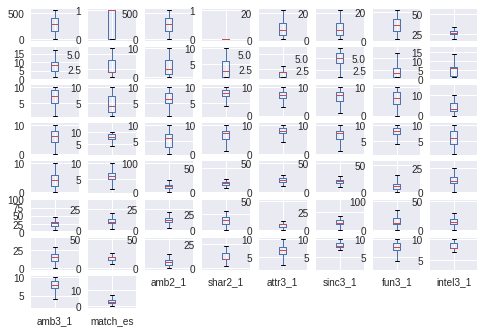

In [24]:
# box and whisker plots
ds_a.plot(kind='box', subplots=True, layout=(8,8), sharex=False)
plt.show()

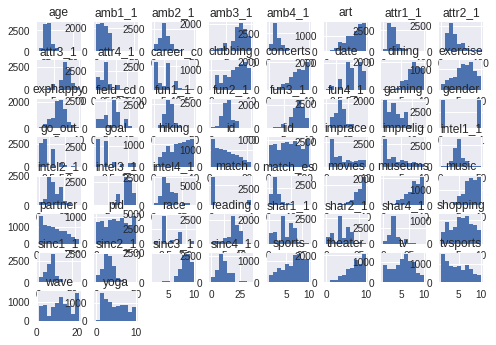

In [25]:
# histograms
ds_a.hist()
plt.show()

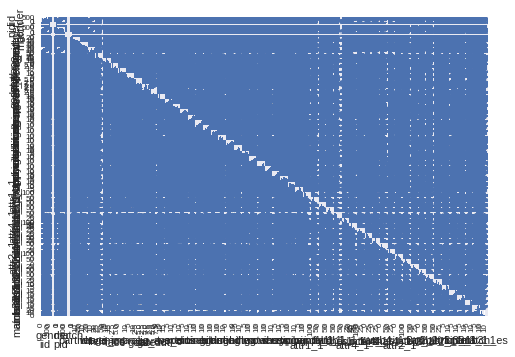

In [26]:
# scatter plot matrix
scatter_matrix(ds_a)
plt.show()

In [0]:
# Split-out validation dataset
array = ds_a.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [0]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [37]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', SVC()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.086392 (0.006276)
LDA: 0.087887 (0.009518)
KNN: 0.258585 (0.018899)


/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


CART: 0.998807 (0.001739)
NB: 0.417493 (0.022470)
SVM: 0.417493 (0.022470)
